In [1]:
from IPython.display import Image as Imagepy
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import speech_recognition as sr
from moviepy.editor import *
from TAMtALUm import * 
from difflib import SequenceMatcher as SM

Texto a traducir:el amor es una magia



[MoviePy] Building file out.gif with imageio


 98%|█████████▊| 50/51 [00:01<00:00, 40.16it/s]


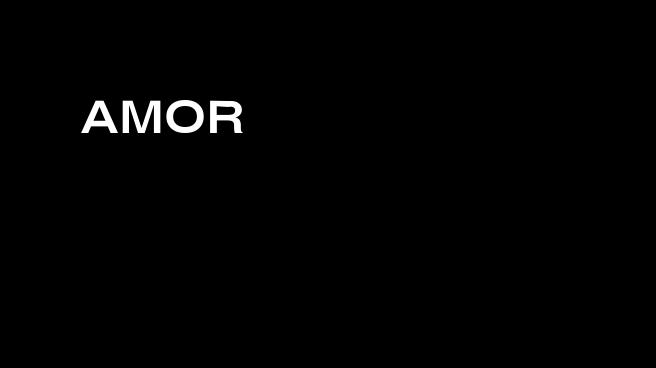

Texto a traducir:$C


In [2]:
#Modulo de pruebas con entrada por teclado con busqueda de coincidencias en logica difusa.
texto = ''
while texto != '$C':
    texto = input("Texto a traducir:")
    if texto == '$C': continue
    lw = tk.tokenize(texto.replace('\n',''))
    ls = sp.split(lw)
    ls = morfo.analyze(ls)
    ls = tagger.analyze(ls)
    ls = sen.analyze(ls);
    ls = wsd.analyze(ls);
    out = ProcessSentences(ls,sdb)
    print ('\n')    
    input_path =  os.getcwd()
    clip = []
    filenames = listdir(input_path+'/Images/')
    for lemmas in out.split():
        diff_found = False
        spell_flag = False
        if lemmas.find('-') != -1:
            letters = lemmas.replace('-','')
            letters = (letters)+'.gif'
            spell_flag = True
        lemmas_ = (lemmas)
        lemmas = (lemmas)+'.gif'
        
        if lemmas in filenames:
            if spell_flag == True:
                for l in letters:
                    clip.append((VideoFileClip(input_path+'/Images/'+l)))
            else:
                clip.append((VideoFileClip(input_path+'/Images/'+lemmas)).set_duration(2))
        else:
            for mi_iterador_diff in filenames:
                my_ratio = (SM(None, lemmas, mi_iterador_diff).ratio())
                ##The ratio value shoud be bigger than 90%
                if my_ratio > 0.90:
                    clip.append((VideoFileClip(input_path+'/Images/'+mi_iterador_diff)).set_duration(2))
                    diff_found = True
                    break
            if  diff_found: continue
            else:
                if spell_flag == True:
                    letters = letters.replace('.gif','')
                    for l in letters:
                        img = Image.open(input_path+'/Images/default.jpg')
                        draw = ImageDraw.Draw(img)
                        font = ImageFont.truetype("SSF.ttf", 45)
                        draw.text((260,170),l,(255,255,255),font=font)
                        img.save('sample_out.jpg')
                        clip.append((VideoFileClip(input_path+'/sample_out.jpg')).set_duration(0.5))
                else: 
                    img = Image.open(input_path+'/Images/default.jpg')
                    draw = ImageDraw.Draw(img)
                    font = ImageFont.truetype("SSF.ttf", 45)
                    draw.text((80,100),lemmas_,(255,255,255),font=font)
                    img.save('sample_out.jpg')
                    clip.append((VideoFileClip(input_path+'/sample_out.jpg')).set_duration(1))            
    if len(clip)>0:
        composition = concatenate_videoclips(clip)
        composition.write_gif('out.gif', fps=10)
        x = Imagepy(filename="out.gif", width=700) 
        display(x)
    else:
        print ('No disponible')